<a href="https://colab.research.google.com/github/tooflesswulf/SpSgOoP/blob/master/gooop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from scipy.signal import savgol_filter, find_peaks

%matplotlib inline

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/data.csv')
dataset = (df.to_numpy()) #this is a stupid way to convert the data and I hate
nump = len(dataset)
t = np.zeros(nump)
x = np.zeros(nump)
y = np.zeros(nump)

for it in range(nump):
    t[it] = dataset[it][0]
    x[it] = dataset[it][1]
    y[it] = dataset[it][2]

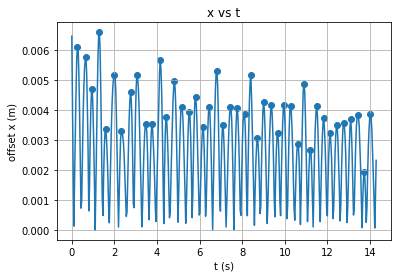

In [ ]:
offset = sum(x) / len(x)
xeff = np.subtract(x, offset)
xsg = savgol_filter(xeff, 11, 2)
xanal = abs(xsg)

peaks = find_peaks(xanal)

tpeaks = t[peaks[0]]
xpeaks = xanal[peaks[0]]

fig, ax = plt.subplots()
plt.plot(t,xanal)
plt.scatter(tpeaks, xpeaks)
ax.grid()
ax.set_title('x vs t')
ax.set_xlabel('t (s)')
ax.set_ylabel('offset x (m)')
plt.show()

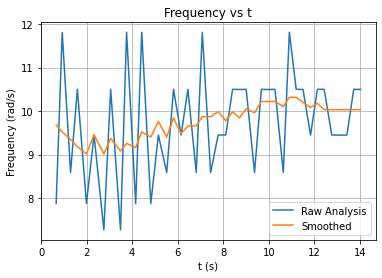

In [ ]:
T = (2) * (np.subtract(tpeaks, ((np.insert(tpeaks, 0, 0))[:-1])))[1:]
OmegaRaw = np.divide(2 * np.pi, T)
Omega = savgol_filter(OmegaRaw, 9, 1)
tcorr = tpeaks[1:]

fig, ax = plt.subplots()
plt.plot(tcorr,OmegaRaw, label = 'Raw Analysis')
plt.plot(tcorr,Omega, label = 'Smoothed')
plt.legend(loc = 'best')
ax.grid()
ax.set_title('Frequency vs t')
ax.set_xlabel('t (s)')
ax.set_ylabel('Frequency (rad/s)')
plt.show()

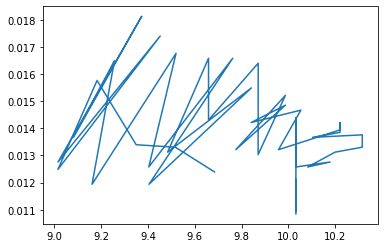

In [ ]:
yeff = (y[peaks[0]])[1:]
plt.plot(Omega, yeff)